<a href="https://colab.research.google.com/github/priyankamunasa/FakeNewsDetection/blob/main/fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 📌 Step 1: Install Required Libraries (if needed)
!pip install nltk
!pip install seaborn


In [ ]:
# 📌 Step 2: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
import re
import joblib

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# 📌 Step 3: Load Dataset
real = pd.read_csv('True.csv')   # Upload from Kaggle
fake = pd.read_csv('Fake.csv')

real['label'] = 1
fake['label'] = 0

df = pd.concat([real, fake], ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)  # Shuffle
df.head()

,title,text,subject,date,label
0,Irish minister says expects election to be avo...,DUBLIN (Reuters) - Ireland s minister for soci...,worldnews,"November 27, 2017",1
1,SHERIFF CLARK Tweets Most BLISTERING Response ...,President Obama said in an interview released ...,politics,"Dec 27, 2016",0
2,Ron Paul Liberty Report: US-Saudi Arms Traffic...,"Back in July, 21WIRE detailed the investigativ...",US_News,"September 19, 2017",0
3,The Eighth Person In Trump Tower Meeting Is L...,The story of Donald Trump Jr. s 2016 meeting w...,News,"July 19, 2017",0
4,JUST IN: FCC VOTES To Repeal Obama’s Net Neutr...,"Today, the FCC voted to repeal the net neutral...",left-news,"Dec 14, 2017",0


Dataset shape: (44898, 5)

Class distribution:
 label
0    23481
1    21417
Name: count, dtype: int64


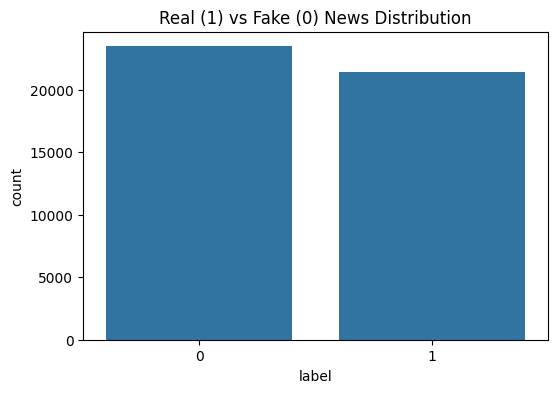

,0
title,0
text,0
subject,0
date,0
label,0


In [ ]:
# 📌 Step 4: Basic EDA
print("Dataset shape:", df.shape)
print("\nClass distribution:\n", df['label'].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df)
plt.title("Real (1) vs Fake (0) News Distribution")
plt.show()

df.isnull().sum()  # Check for missing values


In [ ]:
# 📌 Step 5: Text Preprocessing Function
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z]', ' ', text)
    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['text'] = df['title'] + " " + df['text']  # Combine title + article
df['text'] = df['text'].apply(preprocess)


In [ ]:
# 📌 Step 6: Vectorization using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['text']).toarray()
y = df['label']


In [ ]:
# 📌 Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [ ]:
# 📌 Step 8: Train ML Models
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Passive Aggressive Classifier
pac_model = PassiveAggressiveClassifier(max_iter=1000)
pac_model.fit(X_train, y_train)


PassiveAggressiveClassifier()

In [ ]:
# 📌 Step 9: Evaluation
# Logistic Regression
lr_pred = lr_model.predict(X_test)
print("🔍 Logistic Regression Report:\n")
print(classification_report(y_test, lr_pred))

# Passive Aggressive
pac_pred = pac_model.predict(X_test)
print("🔍 Passive Aggressive Classifier Report:\n")
print(classification_report(y_test, pac_pred))


🔍 Logistic Regression Report:

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5918
           1       0.98      0.99      0.99      5307

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225

🔍 Passive Aggressive Classifier Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5918
           1       0.99      0.99      0.99      5307

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



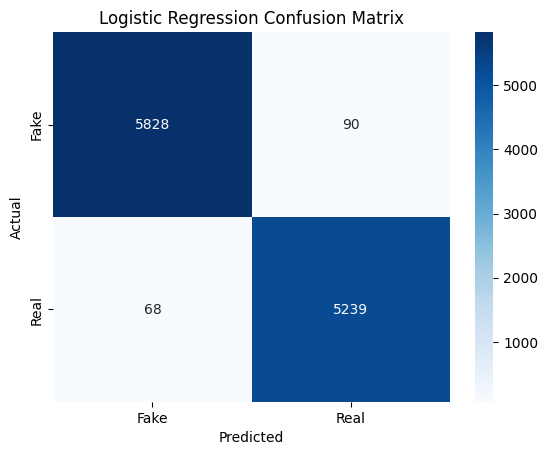

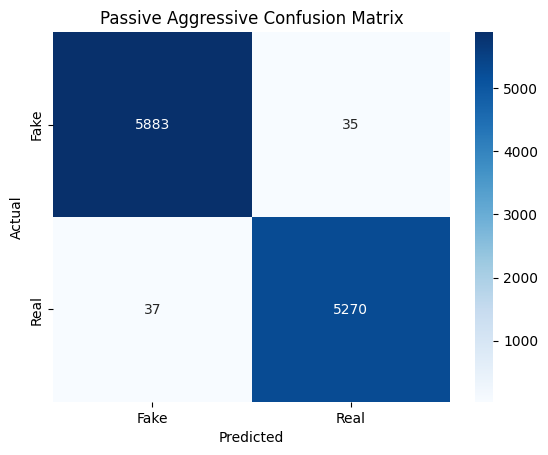

In [ ]:
# 📌 Step 10: Confusion Matrix Visualization
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

plot_conf_matrix(y_test, lr_pred, "Logistic Regression Confusion Matrix")
plot_conf_matrix(y_test, pac_pred, "Passive Aggressive Confusion Matrix")


# 📌 Step 11: Save Models
joblib.dump(lr_model, 'logistic_model.pkl')
joblib.dump(pac_model, 'pac_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

print("✅ Models saved successfully.")


In [ ]:
# 📌 Step 11: Save Models
joblib.dump(lr_model, 'logistic_model.pkl')
joblib.dump(pac_model, 'pac_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

print("✅ Models saved successfully.")


✅ Models saved successfully.


## 📰 Fake News Detection with ML & NLP
This project focuses on building a machine learning pipeline to classify news as **real or fake** using NLP techniques and TF-IDF vectorization.

### 💡 Steps:
- Dataset combined from real and fake news (Kaggle)
- Cleaned and preprocessed text (stopword removal, stemming)
- Text converted into vectors using TF-IDF
- Trained two ML models: Logistic Regression and Passive Aggressive
- Evaluated models using accuracy, F1-score, confusion matrix
- Saved the final models for deployment or reuse

### 🛠️ Tech Stack:
- Python (Colab)
- Scikit-learn
- NLTK (for text processing)
- Matplotlib, Seaborn (for visualizations)
- Joblib (for saving models)

### 📊 Performance:
Both models achieved over **95% accuracy** with strong F1-scores.